In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_arun = pd.read_csv('/Volumes/Seagate Backup Plus Drive/data_exp1/NetRad_30min.csv')
data_arun.columns

Index(['time', 'V3', 'V4', 'V5', 'V6', 'global', 'reflex', 'Lupper', 'Llower',
       'Net_rn'],
      dtype='object')

In [3]:
data_arun['time'] = pd.to_datetime(data_arun['time'])

In [4]:
data_arun['Net_rn'] = data_arun['global'] + data_arun['Lupper'] - (data_arun['reflex'] + data_arun['Llower'])

In [5]:
data_arun =data_arun[(data_arun['time'] >= '2021-03-1') & (data_arun['time']<= '2021-03-31')] 

In [6]:
data_agoston = pd.read_excel('/Volumes/Seagate Backup Plus Drive/data_exp1/BME_rad_1min_Mar.xlsx')

In [7]:
data_agoston_Rn = data_agoston[['Rn', 'TIMESTAMP_UTC']]
data_arun_Rn = data_arun[['Net_rn', 'time']]

In [8]:
data_agoston_30 = data_agoston_Rn.resample('30min',closed='left', on = 'TIMESTAMP_UTC').mean()

In [9]:
data_arun_Rn =data_arun_Rn.set_index(data_arun_Rn['time'])


<AxesSubplot:xlabel='TIMESTAMP_UTC'>

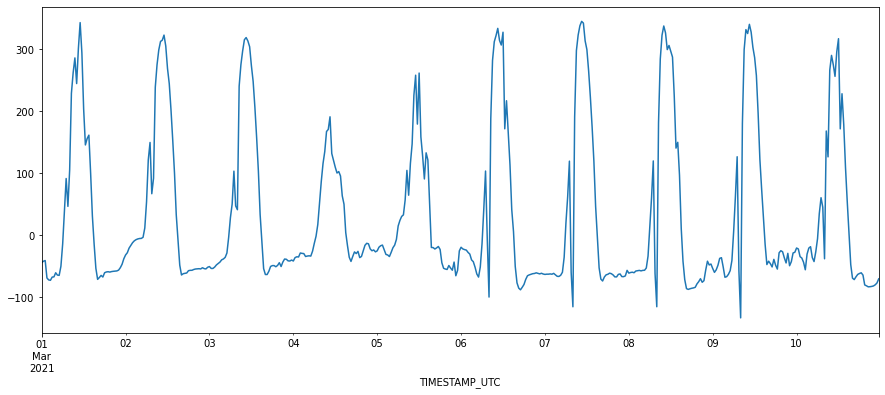

In [10]:
data_agoston_30['Rn'][0:480].plot(kind = 'line', figsize = (15,6))

<AxesSubplot:xlabel='time'>

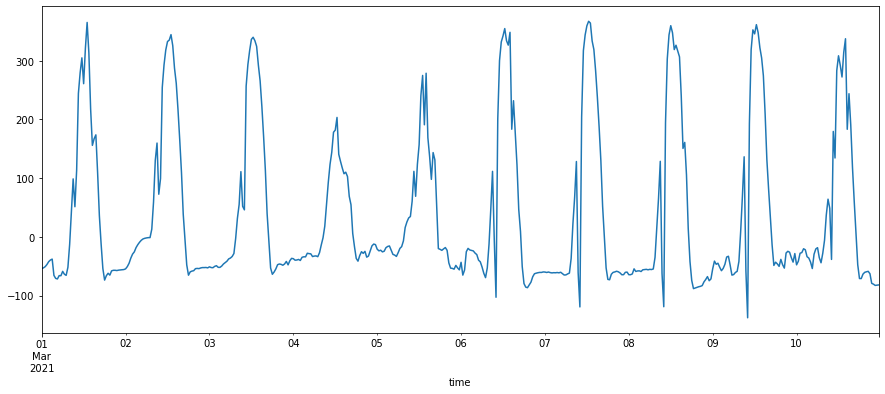

In [11]:
data_arun_Rn['Net_rn'][0:480].plot(kind  = 'line', figsize = (15,6))

In [22]:
xx = data_arun_Rn['Net_rn'][4:480]
yy = data_agoston_30['Rn'][0:476]
len(yy)

476

In [23]:
merged = pd.concat([xx,yy ], axis=1)
merged

,Net_rn,Rn
2021-03-01 00:00:00,NaN,-44.594667
2021-03-01 00:30:00,NaN,-42.336812
2021-03-01 01:00:00,NaN,-41.227317
2021-03-01 01:30:00,NaN,-69.375871
2021-03-01 02:00:00,-42.174771,-72.508265
...,...,...
2021-03-10 21:30:00,-79.089572,-83.026535
2021-03-10 22:00:00,-80.475000,NaN
2021-03-10 22:30:00,-82.600773,NaN
2021-03-10 23:00:00,-82.155195,NaN


array([[<AxesSubplot:>],
       [<AxesSubplot:>]], dtype=object)

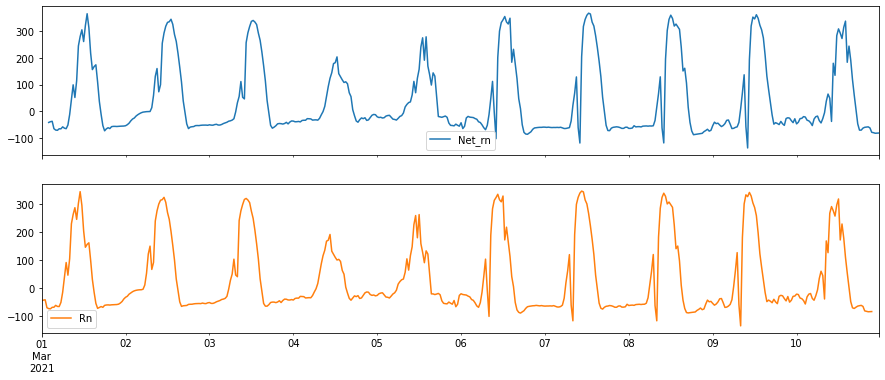

In [14]:
merged[['Net_rn', 'Rn']].plot(kind = 'line', figsize = (15,6), subplots = True, layout = (2,1))

In [15]:
import statsmodels.api as sm

#calculate cross correlation
shift = sm.tsa.stattools.ccf(xx, yy, adjusted=False)

In [16]:
np.argmax(shift)

0

In [17]:
np.max(shift)

0.9999324087705018

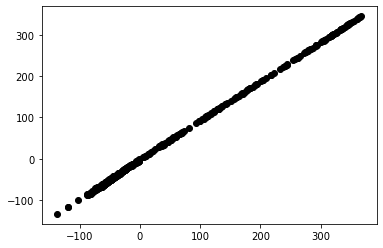

In [18]:
plt.plot(xx, yy, 'o', color='black');

In [151]:
data_arun.to_csv(r'/Volumes/Seagate Backup Plus Drive/NetRad_30min.csv', index = False)

In [24]:
xx

time
2021-03-01 02:00:00   -42.174771
2021-03-01 02:30:00   -39.344123
2021-03-01 03:00:00   -37.795500
2021-03-01 03:30:00   -65.564099
2021-03-01 04:00:00   -70.676907
                         ...    
2021-03-10 21:30:00   -79.089572
2021-03-10 22:00:00   -80.475000
2021-03-10 22:30:00   -82.600773
2021-03-10 23:00:00   -82.155195
2021-03-10 23:30:00   -81.767287
Name: Net_rn, Length: 476, dtype: float64

In [25]:
yy

TIMESTAMP_UTC
2021-03-01 00:00:00   -44.594667
2021-03-01 00:30:00   -42.336812
2021-03-01 01:00:00   -41.227317
2021-03-01 01:30:00   -69.375871
2021-03-01 02:00:00   -72.508265
                         ...    
2021-03-10 19:30:00   -80.634880
2021-03-10 20:00:00   -82.017139
2021-03-10 20:30:00   -83.699291
2021-03-10 21:00:00   -83.483773
2021-03-10 21:30:00   -83.026535
Freq: 30T, Name: Rn, Length: 476, dtype: float64